In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [65]:
%matplotlib?

In [66]:
#定义一个读取文件生成数据的函数，然后返回生成的数据
#这里1、使用format进行字符串的格式化操作
#2、运用 python的with 方法方便的进行异常的处理，和对资源的清理，省了些 try catch finally的步骤
def open_csv(csv_name):
    with open(r'D:\ml\rossmann-store-sales\rossmann-store-sales\{}'.format(csv_name)) as f:
        data = pd.read_csv(f)
    return data

In [67]:
#分别创建 训练数据集，测试数据集，和商店的描述数据
data_store = open_csv('store.csv')
data_train = open_csv('train.csv')
data_test = open_csv('test.csv')


D:\ProgramFiles\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2901: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


data_train 加载数据的时候提示有 多类型值，在数据第七列

In [68]:
#定义函数用来查看各行的信息以及各列的信息
def check_files(data,data_name,lineno):
    print('{:*^30}'.format('{}前{}行').format(data_name,str(lineno)))
    print(data.head(lineno))
    
    print('{:*^30}'.format('{}各列信息').format(data_name))
    print('{}\n\n\n'.format(data.info()))

In [69]:
#调用上面的函数查看信息
datas = [data_store,data_train,data_test]
data_names = ['data_store','data_train','data_test']
#c = [1,2,3]
lineno = 10
#用zip方法，把两个列表合并成一个元组
for data,data_name in zip(datas,data_names):
    check_files(data,data_name,lineno)

************data_store前10行************
   Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0      1         c          a               1270.0                        9.0   
1      2         a          a                570.0                       11.0   
2      3         a          a              14130.0                       12.0   
3      4         c          c                620.0                        9.0   
4      5         a          a              29910.0                        4.0   
5      6         a          a                310.0                       12.0   
6      7         a          c              24000.0                        4.0   
7      8         a          a               7520.0                       10.0   
8      9         a          c               2030.0                        8.0   
9     10         a          a               3160.0                        9.0   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear

In [70]:
#观察data_store的每个属性列的取值总共有哪些值，然后决定要怎么处理每个属性列中的空值
def check_unique(data):
    for column in data:
        print("列{}的取值，共有：".format(column),len(data[column].unique()))
        #print('{}为一值数量:'.format(column),len(data[column].unique()))
check_unique(data_store)

列Store的取值，共有： 1115
列StoreType的取值，共有： 4
列Assortment的取值，共有： 3
列CompetitionDistance的取值，共有： 655
列CompetitionOpenSinceMonth的取值，共有： 13
列CompetitionOpenSinceYear的取值，共有： 24
列Promo2的取值，共有： 2
列Promo2SinceWeek的取值，共有： 25
列Promo2SinceYear的取值，共有： 8
列PromoInterval的取值，共有： 4


Store 这一列从数据看应当是 每个商店的编号，从1到1115 分别代表 1号到1115号商店  
CompetitionOpenSinceMonth 这一列代表的如果是月份 不同的值应当只有12个月，这里为啥会出现13个月 

月份有空值 ，这里需要考虑对空值的处理方式

In [71]:

print(data_store.astype(str).groupby(['StoreType']).size())
print(data_store.astype(str).groupby(['Assortment']).size())
print(data_store.astype(str).groupby(['CompetitionOpenSinceYear']).size())
print(data_store.astype(str).groupby(['CompetitionOpenSinceMonth']).size())
print(data_store.astype(str).groupby(['Promo2']).size())
print(data_store.astype(str).groupby(['Promo2SinceWeek']).size())
print(data_store.astype(str).groupby(['Promo2SinceYear']).size())
print(data_store.astype(str).groupby(['PromoInterval']).size())



StoreType
a    602
b     17
c    148
d    348
dtype: int64
Assortment
a    593
b      9
c    513
dtype: int64
CompetitionOpenSinceYear
1900.0      1
1961.0      1
1990.0      5
1994.0      2
1995.0      2
1998.0      1
1999.0      8
2000.0     10
2001.0     16
2002.0     27
2003.0     19
2004.0     22
2005.0     62
2006.0     47
2007.0     48
2008.0     54
2009.0     54
2010.0     55
2011.0     54
2012.0     82
2013.0     83
2014.0     70
2015.0     38
nan       354
dtype: int64
CompetitionOpenSinceMonth
1.0      14
10.0     61
11.0     92
12.0     64
2.0      41
3.0      70
4.0      94
5.0      44
6.0      50
7.0      67
8.0      39
9.0     125
nan     354
dtype: int64
Promo2
0    544
1    571
dtype: int64
Promo2SinceWeek
1.0      35
10.0     42
13.0     34
14.0     81
18.0     29
22.0     33
23.0      5
26.0      1
27.0     11
28.0      1
31.0     44
35.0     25
36.0     10
37.0     35
39.0      6
40.0     77
44.0      3
45.0     34
48.0      9
49.0      1
5.0      39
50.0      1
6.0

1、从上面的结果 粗略观察，看到 竞争对手开业的年份和周 为空的记录数是匹配的，促销始于的年份、周、和频率的通知是匹配的。  
2、a 类商品数量最多，09年控死开始进行促销，竞争对手从2000年开始向后逐渐升高 ，每年1,4,7,10 参与促销的店最多  

In [72]:
#看看训练数据与测试数据的各个列的取值情况
data_train.head(10)
check_unique(data_train)

列Store的取值，共有： 1115
列DayOfWeek的取值，共有： 7
列Date的取值，共有： 942
列Sales的取值，共有： 21734
列Customers的取值，共有： 4086
列Open的取值，共有： 2
列Promo的取值，共有： 2
列StateHoliday的取值，共有： 5
列SchoolHoliday的取值，共有： 2


In [73]:
#检查一下每个列的取值唯一情况
print(data_train.astype(str).groupby(['DayOfWeek']).size())
print(data_train.astype(str).groupby(['Open']).size())
print(data_train.astype(str).groupby(['Promo']).size())
print(data_train.astype(str).groupby(['StateHoliday']).size())
print(data_train.astype(str).groupby(['SchoolHoliday']).size())

DayOfWeek
1    144730
2    145664
3    145665
4    145845
5    145845
6    144730
7    144730
dtype: int64
Open
0    172817
1    844392
dtype: int64
Promo
0    629129
1    388080
dtype: int64
StateHoliday
0    986159
a     20260
b      6690
c      4100
dtype: int64
SchoolHoliday
0    835488
1    181721
dtype: int64


In [74]:
data_train.StateHoliday.unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [75]:

data_train.StateHoliday=data_train.StateHoliday.map({'0':'无',0:'无','a':'公共假日','b':'复活节假期','c':'圣诞节'})
data_train.StateHoliday.unique()
print(data_train.groupby(data_train.StateHoliday).size())

StateHoliday
公共假日      20260
圣诞节        4100
复活节假期      6690
无        986159
dtype: int64


In [76]:
check_unique(data_test)


列Id的取值，共有： 41088
列Store的取值，共有： 856
列DayOfWeek的取值，共有： 7
列Date的取值，共有： 48
列Open的取值，共有： 3
列Promo的取值，共有： 2
列StateHoliday的取值，共有： 2
列SchoolHoliday的取值，共有： 2


In [77]:
data_test.StateHoliday=data_test.StateHoliday.map({'0':'无',0:'无','a':'公共假日','b':'复活节假期','c':'圣诞节'})
data_test.StateHoliday.unique()

array(['无', '公共假日'], dtype=object)

In [90]:
print(data_test.Open.unique())
print(data_test.astype(str).groupby(['Open']).size())

[ 1. nan  0.]
Open
0.0     5984
1.0    35093
nan       11
dtype: int64


In [91]:
#对缺失值和空值进行处理，前提是先找到哪些列有缺失值和空值
def check_none(data):
    print("{:*^30}".format('有空值的列'))
    print(data.isnull().any(axis = 0))
    print("{:*^30}".format('有空值的行'))
    print(data.isnull().any(axis = 1).sum())

In [92]:
#对store进行判定
check_none(data_store)

************有空值的列*************
Store                        False
StoreType                    False
Assortment                   False
CompetitionDistance           True
CompetitionOpenSinceMonth     True
CompetitionOpenSinceYear      True
Promo2                       False
Promo2SinceWeek               True
Promo2SinceYear               True
PromoInterval                 True
dtype: bool
************有空值的行*************
750


1、和竞争对手距离相关的列存在空值  
2、和促销相关的列存在空值  
3、有空值的行有750 行，一半以上的行存在空值，需要进行处理

In [93]:
#对train进行判定
check_none(data_train)

************有空值的列*************
Store            False
DayOfWeek        False
Date             False
Sales            False
Customers        False
Open             False
Promo            False
StateHoliday     False
SchoolHoliday    False
dtype: bool
************有空值的行*************
0


训练数据不需特别处理

In [94]:
#对test进行判定
check_none(data_test)

************有空值的列*************
Id               False
Store            False
DayOfWeek        False
Date             False
Open              True
Promo            False
StateHoliday     False
SchoolHoliday    False
dtype: bool
************有空值的行*************
11


In [20]:
#竞争对手距离，开启的年份，开启的月份有空，三者为空是不是伴随出现的，对于促销也是同理，无促销就无促销日期，无竞争对手就无竞争对手的开启时间，对空值列进行检测
def check_none_together(data,columns):
    indexes = {}
    indexes_len={}
    for column in columns:
        #print(len(data[data[column].isnull()].index))
        index = data[data[column].isnull()].index
        if column not in indexes:
            indexes[column] = index
            indexes_len[column] = len(index)
            
           # indexes[column].append(index)
          #  indexes_len[column].append()
    
    compare_dict = {}
    for key1 in indexes:
        for key2 in indexes:
            if key1 == key2:continue

            if key1 not in compare_dict:
                compare_dict[key1] = {}
                compare_dict[key1][key2] = 1
            else:
                if key2 not in compare_dict[key1]:
                    compare_dict[key1][key2] = 1
                else:
                    continue
            
            if key2 not in compare_dict:
                compare_dict[key2] = {}
                compare_dict[key2][key1] = 1
            else:
                if key1 not in compare_dict[key2]:
                    compare_dict[key2][key1] = 1
                else:
                    continue
                    
         #   print(key2)
            if set(indexes[key1]) == set(indexes[key2]):
                print('列{}和列{}的相同行是空值'.format(key1,key2))
            else:
                print('列{}缺失行数是{}：，列{}的缺失行数是：{},缺失值行数不同'.format(key1,indexes_len[key1],key2,indexes_len[key2]))

        

check_none_together(data_store,['CompetitionDistance','CompetitionOpenSinceMonth','CompetitionOpenSinceYear'])
check_none_together(data_store,['Promo2SinceWeek','Promo2SinceYear','PromoInterval'])



列CompetitionDistance缺失行数是3：，列CompetitionOpenSinceMonth的缺失行数是：354,缺失值行数不同
列CompetitionDistance缺失行数是3：，列CompetitionOpenSinceYear的缺失行数是：354,缺失值行数不同
列CompetitionOpenSinceMonth和列CompetitionOpenSinceYear的相同行是空值
列Promo2SinceWeek和列Promo2SinceYear的相同行是空值
列Promo2SinceWeek和列PromoInterval的相同行是空值
列Promo2SinceYear和列PromoInterval的相同行是空值


In [101]:
#观察一下促销相关的列与是否促销列：Promo2为0的索引是否一致
index = data_store[data_store['Promo2SinceWeek'].isnull()].index
print(len(index))
a = sum(data_store.iloc[index]['Promo2'])
print(a)

544
0


验证的结论就是如果没有参与促销，促销相关内容的列都是空

In [102]:
data_train_new=pd.merge(data_train,data_store,on='Store',how='left')
data_train_new.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015/7/31,5263,555,1,1,无,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015/7/31,6064,625,1,1,无,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015/7/31,8314,821,1,1,无,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015/7/31,13995,1498,1,1,无,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015/7/31,4822,559,1,1,无,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [103]:
data_train_new.Date=pd.to_datetime(data_train_new.Date)
data_train_new.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,无,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,无,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,无,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,无,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,无,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [104]:
data_train_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
Store                        1017209 non-null int64
DayOfWeek                    1017209 non-null int64
Date                         1017209 non-null datetime64[ns]
Sales                        1017209 non-null int64
Customers                    1017209 non-null int64
Open                         1017209 non-null int64
Promo                        1017209 non-null int64
StateHoliday                 1017209 non-null object
SchoolHoliday                1017209 non-null int64
StoreType                    1017209 non-null object
Assortment                   1017209 non-null object
CompetitionDistance          1014567 non-null float64
CompetitionOpenSinceMonth    693861 non-null float64
CompetitionOpenSinceYear     693861 non-null float64
Promo2                       1017209 non-null int64
Promo2SinceWeek              509178 non-null float64
Promo2SinceYear              509178 no

D:\ProgramFiles\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,0,'销售总额/万元')

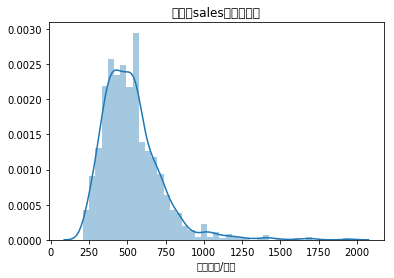

In [120]:
#每家店sales总额的分布
df1=data_train_new.groupby('Store')['Sales'].sum()/10000
sns.distplot(df1)
plt.title('每家店sales总额的分布')
plt.xlabel('销售总额/万元')

销售额的直方图分布，绝大部分的店铺的销售总额在250W到750W之间  

Text(0.5,1,'一周不同的天平均每天每个店的销售情况')

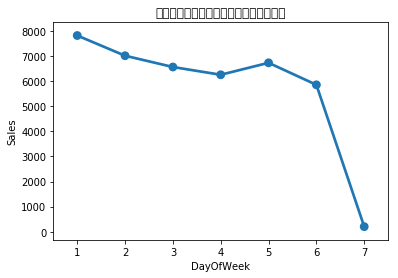

In [122]:
#一周不同的天平均每天每个店的销售情况
#sns.pointplot(data=data_train_new[::100],x='DayOfWeek',y='Sales') 让sns作groupby统计耗时非常长，所以需要先group不要做处理
df2=data_train_new.groupby('DayOfWeek')['Sales'].mean().reset_index()
sns.pointplot(data=df2,x='DayOfWeek',y='Sales')
plt.title('一周不同的天平均每天每个店的销售情况')


按照周一到周日来看，周日的平均销量最低，猜测是不是周日不开门导致

   DayOfWeek  open_rate
0          1   0.950459
1          2   0.988309
2          3   0.974400
3          4   0.923199
4          5   0.950598
5          6   0.995357
6          7   0.024826


Text(0.5,1,'一周的平均营业率')

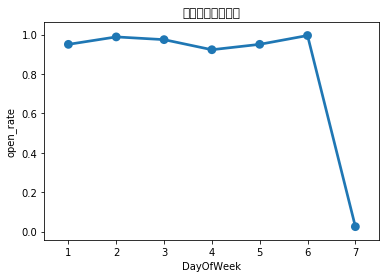

In [136]:
#一周的平均营业率
df3=data_train_new.groupby('DayOfWeek')['Open'].mean().reset_index().rename(columns={'Open':'open_rate'})
print(df3)
sns.pointplot(data=df3,x='DayOfWeek',y='open_rate')
plt.title('一周的平均营业率')

周日营业概率很低，所以周日的销量也很低

Text(0.5,1,'每月平均销售额情况')

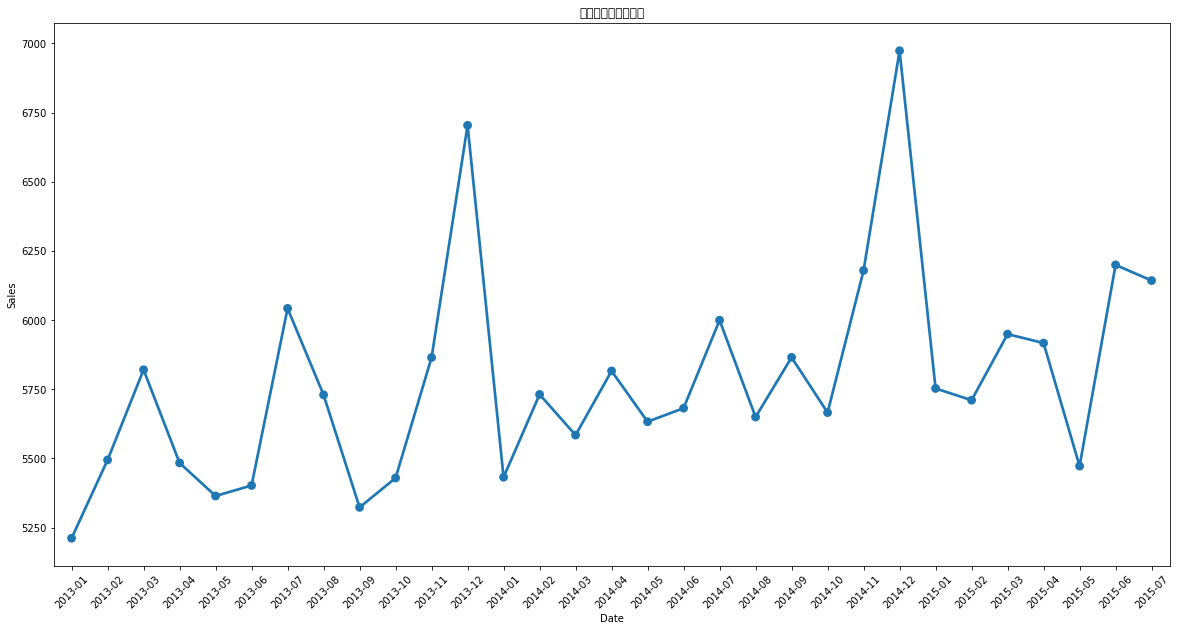

In [138]:
#探索每个月平均销售情况
df4=data_train_new.groupby('Date')['Sales'].mean().resample('M',kind='period').mean().reset_index()#resample能够把聚合时间变成月份，去除日
fig=plt.figure(figsize=(20,10))
ax=fig.add_subplot(1,1,1)
sns.pointplot(data=df4,x='Date',y='Sales',ax=ax)
plt.xticks(rotation=45)
ax.set_title('每月平均销售额情况')


没有特别明显的分布特征，但12月份连续两年都最高

In [139]:
#对data_train_new日期进行年，月，日进行处理
data_train_new['year']=data_train_new.Date.map(lambda x:x.year)
data_train_new['month']=data_train_new.Date.map(lambda x:x.month)
data_train_new['day']=data_train_new.Date.map(lambda x:x.day)
data_train_new.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,year,month,day
0,1,5,2015-07-31,5263,555,1,1,无,1,c,...,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,31
1,2,5,2015-07-31,6064,625,1,1,无,1,a,...,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31
2,3,5,2015-07-31,8314,821,1,1,无,1,a,...,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31
3,4,5,2015-07-31,13995,1498,1,1,无,1,c,...,620.0,9.0,2009.0,0,NaN,NaN,NaN,2015,7,31
4,5,5,2015-07-31,4822,559,1,1,无,1,a,...,29910.0,4.0,2015.0,0,NaN,NaN,NaN,2015,7,31


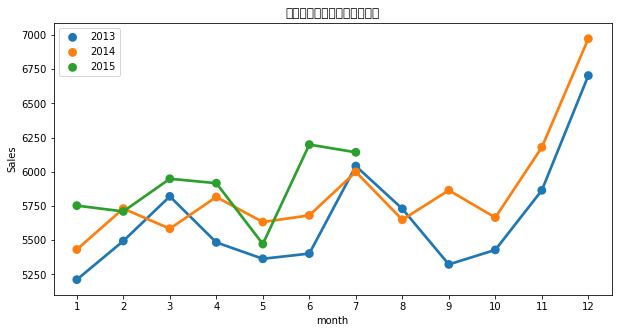

In [141]:
#不同年每个月份平均销售情况
df5=data_train_new.Sales.groupby([data_train_new.year,data_train_new.month]).mean().reset_index()
fig=plt.figure(figsize=(10,5))
ax=fig.add_subplot(1,1,1)
sns.pointplot(x='month',y='Sales',hue='year',data=df5,ax=ax)

plt.title('不同年每个月份平均销售情况')
plt.legend(loc='best')

每年销售额随月份波动很明显，但连续两年的统一规律是 10-12月份急速上升之后，1月份回落

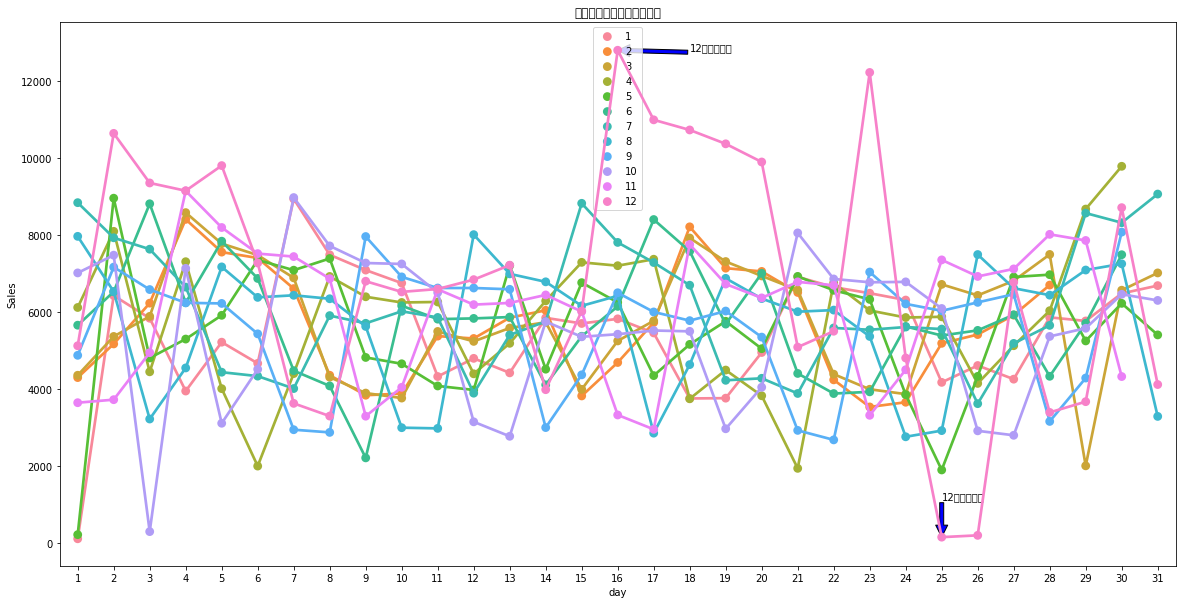

In [143]:
#不同月份每天平均销售情况
df6=data_train_new.Sales.groupby([data_train_new.month,data_train_new.day]).mean().reset_index()
fig=plt.figure(figsize=(20,10))
ax=fig.add_subplot(1,1,1)
sns.pointplot(x='day',y='Sales',hue='month',data=df6,ax=ax)
ax.set_title('不同月份每天平均销售情况')

#标记12月份最高值与最低值
dec_max=df6[df6.month==12].Sales.max()
dec_min=df6[df6.month==12].Sales.min()
plt.annotate('12月份最高值',xy=(15,dec_max),xytext=(17,dec_max),arrowprops={'facecolor':'b'})#xy中横坐标第一个数为1，所以填写的横坐标和图上的差一
plt.annotate('12月份最低值',xy=(24,dec_min),xytext=(24,dec_min+1000),arrowprops={'facecolor':'b'})
plt.legend(loc='best')



与时间的分布关系中显示出：  
1、每周日基本不营业，不营业的状况下，营业额低  
2、每一年10,11,12月份营业额急速上升，在1月份落到全年谷底  
3、12月份中16日上升之后缓慢下降，直到25日到谷底 

D:\ProgramFiles\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.


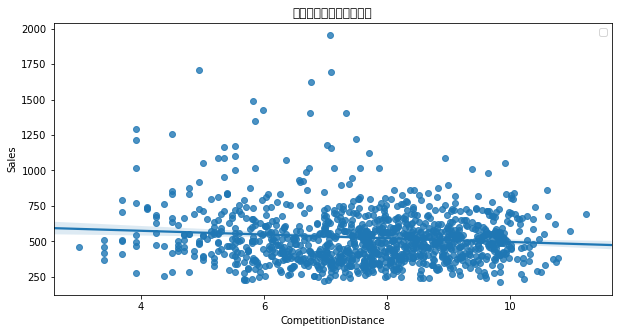

In [146]:
#探索竞争者距离和销售额关系
df7=data_train_new.groupby('Store')['CompetitionDistance','Sales'].agg({'CompetitionDistance':'mean','Sales':'sum'})#每个店销售总额
df7['CompetitionDistance']=df7['CompetitionDistance'].map(lambda x:np.log(x))#对距离取log，收缩分布
df7['Sales']=df7['Sales'].map(lambda x:x/10000)#销售额以万元为单位
fig=plt.figure(figsize=(10,5))
ax=fig.add_subplot(1,1,1)
sns.regplot(x='CompetitionDistance',y='Sales',data=df7,ax=ax)
ax.set_title('竞争者距离和销售额关系')
plt.legend(loc='best')


D:\ProgramFiles\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


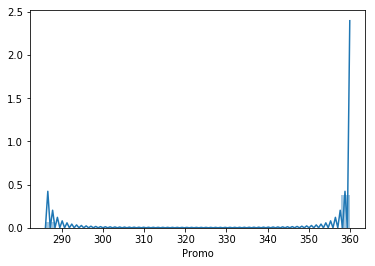

In [147]:
#店铺促销次数比例分布
df7=data_train_new.groupby('Store')['Promo'].sum()
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
sns.distplot(df7,ax=ax)

[Text(0.5,1,'店铺促销次数分布')]

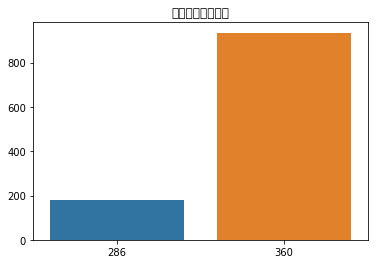

In [148]:
df8=df7.value_counts()
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
sns.barplot(df8.index,df8.values,ax=ax)
ax.set(**{'title':'店铺促销次数分布'})

[Text(0.5,1,'促销天和非促销天销售分布情况')]

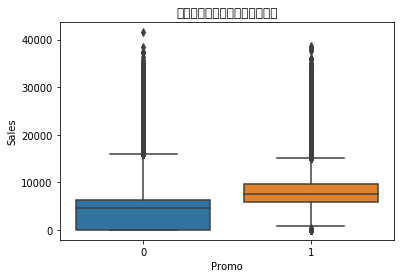

In [149]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
sns.boxplot(y='Sales',x='Promo',data=data_train_new,ax=ax)
ax.set(**{'title':'促销天和非促销天销售分布情况'})


[Text(0.5,1,'促销天和非促销天销售分布情况')]

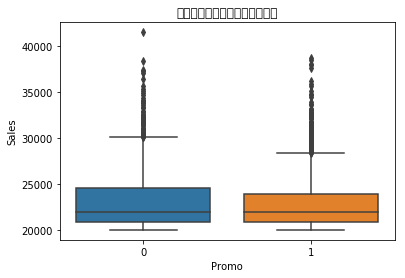

In [164]:
#对比促销天和非促销天销售分布情况(一天销售额超过20000的)
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
sns.boxplot(y='Sales',x='Promo',data=data_train_new[data_train_new.Sales>20000],ax=ax)
ax.set(**{'title':'促销天和非促销天销售分布情况'})


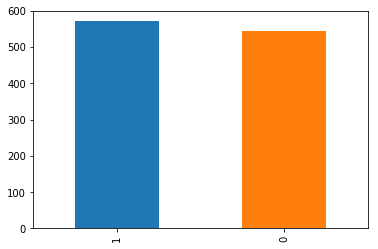

In [167]:
#有无promo2的店数量对比
df9=data_store.Promo2.value_counts()
df9.plot(kind='bar')


[Text(0.5,1,'有无promo2的每天每个店销售情况对比')]

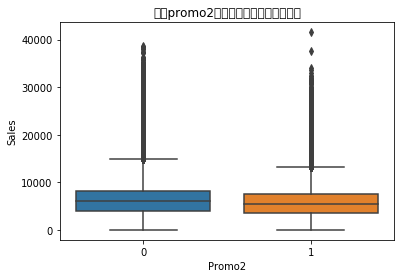

In [168]:
#有无promo2的每天每个店销售情况对比
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
sns.boxplot(y='Sales',x='Promo2',data=data_train_new,ax=ax)
ax.set(**{'title':'有无promo2的每天每个店销售情况对比'})

[Text(0.5,1,'有无promo2的店铺的平均每天销售情况对比(平均销售额大于10000的店)')]

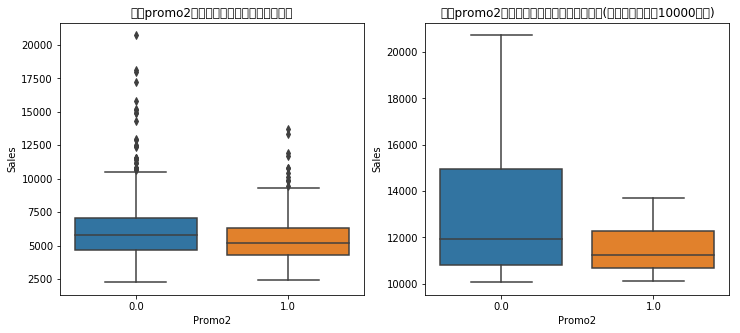

In [169]:
#有无promo2的店铺的平均每天销售情况对比
df10=data_train_new.groupby('Store')['Promo2','Sales'].mean()
fig=plt.figure(figsize=(12,5))
ax=fig.subplots(1,2)
sns.boxplot(y='Sales',x='Promo2',data=df10,ax=ax[0])
ax[0].set(**{'title':'有无promo2的店铺的平均每天销售情况对比'})
sns.boxplot(y='Sales',x='Promo2',data=df10[df10.Sales>=10000],ax=ax[1])
ax[1].set(**{'title':'有无promo2的店铺的平均每天销售情况对比(平均销售额大于10000的店)'})

D:\ProgramFiles\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[Text(0.5,1,'国家节假日的销售分布(营业的店)')]

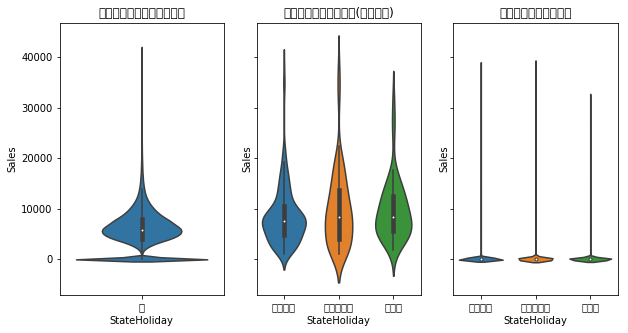

In [170]:
#对比stateholiday销售分布情况
fig,ax=plt.subplots(1,3,sharey=True,figsize=(10,5))

#不是国家节假日的销售分布
sns.violinplot(y='Sales',x='StateHoliday',data=data_train_new[data_train_new.StateHoliday=='无'],ax=ax[0])
ax[0].set(**{'title':'不是国家节假日的销售分布'})
#国家节假日的销售分布
sns.violinplot(y='Sales',x='StateHoliday',data=data_train_new[data_train_new.StateHoliday!='无'],ax=ax[2])
ax[2].set(**{'title':'国家节假日的销售分布'})
#国家节假日的销售分布(营业的店)
sns.violinplot(y='Sales',x='StateHoliday',data=data_train_new[(data_train_new.StateHoliday!='无')&(data_train_new.Sales>0)],ax=ax[1])
ax[1].set(**{'title':'国家节假日的销售分布(营业的店)'})

[Text(0.5,1,'SchoolHoliday的销售分布（Sales>=15000）')]

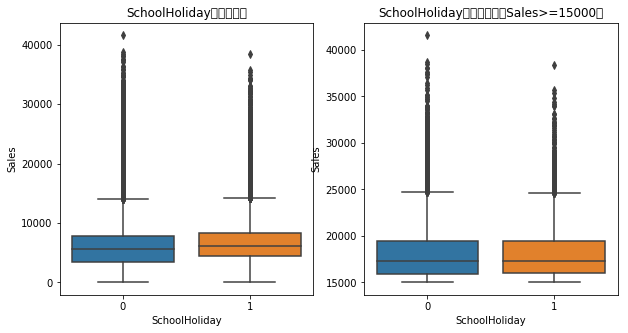

In [172]:
#对比SchoolHoliday销售分布情况

fig,ax=plt.subplots(1,2,figsize=(10,5))
#SchoolHoliday的销售分布
sns.boxplot(y='Sales',x='SchoolHoliday',data=data_train_new,ax=ax[0])
ax[0].set(**{'title':'SchoolHoliday的销售分布'})
#SchoolHoliday的销售分布（Sales>=15000）
sns.boxplot(y='Sales',x='SchoolHoliday',data=data_train_new[data_train_new.Sales>=15000],ax=ax[1])
ax[1].set(**{'title':'SchoolHoliday的销售分布（Sales>=15000）'})


D:\ProgramFiles\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[Text(0.5,1,'不同StoreType的平均每天每个商店销售分布')]

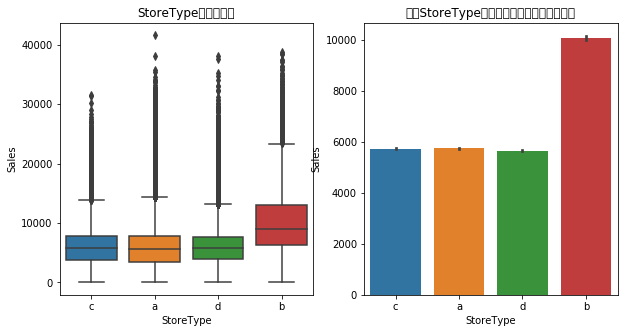

In [173]:
#StoreType
fig,ax=plt.subplots(1,2,figsize=(10,5))
#StoreType的销售分布
sns.boxplot(y='Sales',x='StoreType',data=data_train_new,ax=ax[0])
ax[0].set(**{'title':'StoreType的销售分布'})
sns.barplot(y='Sales',x='StoreType',data=data_train_new,ax=ax[1])
ax[1].set(**{'title':'不同StoreType的平均每天每个商店销售分布'})

b类的销售额更高

D:\ProgramFiles\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[Text(0.5,1,'不同Assortment的平均每天每个商店销售分布')]

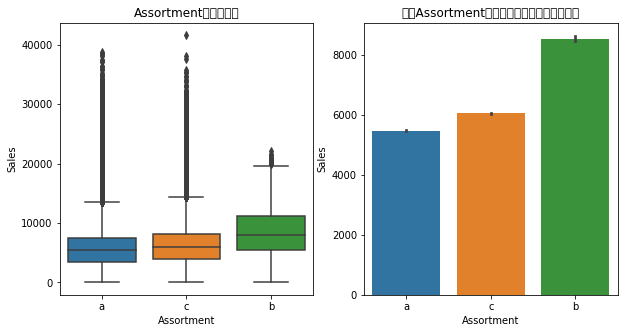

In [174]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
#Assortment的销售分布
sns.boxplot(y='Sales',x='Assortment',data=data_train_new,ax=ax[0])
ax[0].set(**{'title':'Assortment的销售分布'})
sns.barplot(y='Sales',x='Assortment',data=data_train_new,ax=ax[1])
ax[1].set(**{'title':'不同Assortment的平均每天每个商店销售分布'})

对于Assortment，可以看出b类型最高，c比a类型高一些

[Text(0.5,1,'顾客数与销售额的关系')]

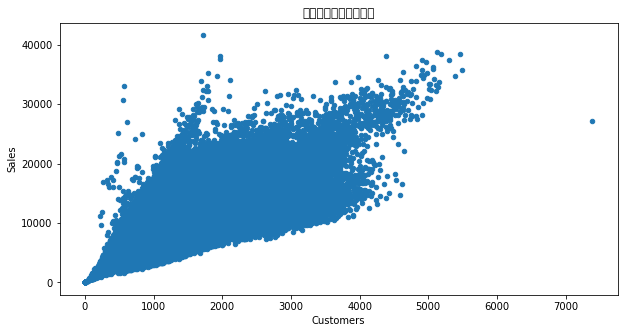

In [175]:
#顾客数与销售额的关系
fig=plt.figure(figsize=(10,5))
ax=fig.add_subplot(1,1,1)
data_train_new.plot.scatter(y='Sales',x='Customers',ax=ax)
ax.set(**{'title':'顾客数与销售额的关系'})

[Text(0.5,1,'是否营业与销售额关系')]

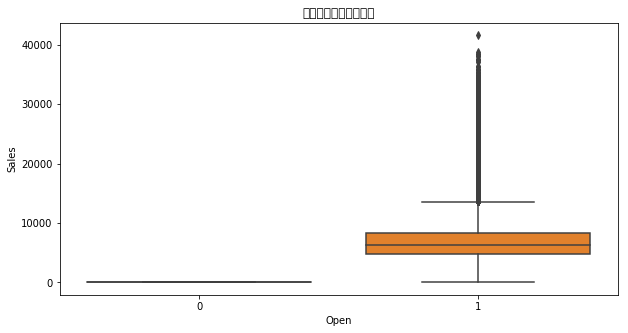

In [176]:
#探索是否营业与销售额关系
fig=plt.figure(figsize=(10,5))
ax=fig.add_subplot(1,1,1)
sns.boxplot(y='Sales',x='Open',data=data_train_new,ax=ax)
ax.set(**{'title':'是否营业与销售额关系'})

In [178]:
#如下进行特征工程

#删除顾客数一列
data_train=data_train.drop('Customers',axis=1)
#对data_test先做和data_train之前相同的变化
#data_test.StateHoliday=data_test.StateHoliday.map({'0':'无',0:'无','a':'公共假日','b':'复活节假期','c':'圣诞节'})
#连接test表和train表
data_train_test=pd.concat([data_train,data_test.drop('Id',axis=1)],axis=0,ignore_index=True)
data_train_test.sample(5)

D:\ProgramFiles\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,Date,DayOfWeek,Open,Promo,Sales,SchoolHoliday,StateHoliday,Store
915525,2013/4/2,2,1.0,0,7025.0,1,无,896
974900,2013/2/7,4,1.0,1,3792.0,0,无,61
774963,2013/8/6,2,1.0,0,4590.0,0,无,824
6864,2015/7/25,6,1.0,0,5343.0,0,无,175
809196,2013/7/6,6,1.0,0,6783.0,0,无,492


In [179]:
#连接store表和train_test表
data_train_test=pd.merge(data_train_test,data_store,on='Store',how='left')
data_train_test.head(3)

,Date,DayOfWeek,Open,Promo,Sales,SchoolHoliday,StateHoliday,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,2015/7/31,5,1.0,1,5263.0,1,无,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2015/7/31,5,1.0,1,6064.0,1,无,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,2015/7/31,5,1.0,1,8314.0,1,无,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"


In [180]:
data_train_test.Date=pd.to_datetime(data_train_test.Date)
data_train_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1058297 entries, 0 to 1058296
Data columns (total 17 columns):
Date                         1058297 non-null datetime64[ns]
DayOfWeek                    1058297 non-null int64
Open                         1058286 non-null float64
Promo                        1058297 non-null int64
Sales                        1017209 non-null float64
SchoolHoliday                1058297 non-null int64
StateHoliday                 1058297 non-null object
Store                        1058297 non-null int64
StoreType                    1058297 non-null object
Assortment                   1058297 non-null object
CompetitionDistance          1055559 non-null float64
CompetitionOpenSinceMonth    719733 non-null float64
CompetitionOpenSinceYear     719733 non-null float64
Promo2                       1058297 non-null int64
Promo2SinceWeek              533034 non-null float64
Promo2SinceYear              533034 non-null float64
PromoInterval                5330

In [181]:
#把日期时间分解
data_train_test['year']=data_train_test.Date.map(lambda x:x.year)
data_train_test['month']=data_train_test.Date.map(lambda x:x.month)
data_train_test['day']=data_train_test.Date.map(lambda x:x.day)
data_train_test['Date']=data_train_test.Date.map(lambda x:x.date())
#检查空值
check_none(data_train_test)

************有空值的列*************
Date                         False
DayOfWeek                    False
Open                          True
Promo                        False
Sales                         True
SchoolHoliday                False
StateHoliday                 False
Store                        False
StoreType                    False
Assortment                   False
CompetitionDistance           True
CompetitionOpenSinceMonth     True
CompetitionOpenSinceYear      True
Promo2                       False
Promo2SinceWeek               True
Promo2SinceYear               True
PromoInterval                 True
year                         False
month                        False
day                          False
dtype: bool
************有空值的行*************
733971


In [182]:
#检查open列空值情况
sum(data_train_test.Open.isnull())
11

11

In [183]:
#查看这11行的缺失情况
data_train_test[data_train_test.Open.isnull()]

,Date,DayOfWeek,Open,Promo,Sales,SchoolHoliday,StateHoliday,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,year,month,day
1017688,2015-09-17,4,NaN,1,NaN,0,无,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN,2015,9,17
1018544,2015-09-16,3,NaN,1,NaN,0,无,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN,2015,9,16
1019400,2015-09-15,2,NaN,1,NaN,0,无,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN,2015,9,15
1020256,2015-09-14,1,NaN,1,NaN,0,无,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN,2015,9,14
1021968,2015-09-12,6,NaN,0,NaN,0,无,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN,2015,9,12
1022824,2015-09-11,5,NaN,0,NaN,0,无,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN,2015,9,11
1023680,2015-09-10,4,NaN,0,NaN,0,无,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN,2015,9,10
1024536,2015-09-09,3,NaN,0,NaN,0,无,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN,2015,9,9
1025392,2015-09-08,2,NaN,0,NaN,0,无,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN,2015,9,8
1026248,2015-09-07,1,NaN,0,NaN,0,无,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN,2015,9,7


In [184]:
data_train_test.loc[[1017688,1018544,1019400,1020256],'Open']=1
data_train_test.loc[[1017688,1018544,1019400,1020256]]#检查是否改正成功

,Date,DayOfWeek,Open,Promo,Sales,SchoolHoliday,StateHoliday,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,year,month,day
1017688,2015-09-17,4,1.0,1,NaN,0,无,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN,2015,9,17
1018544,2015-09-16,3,1.0,1,NaN,0,无,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN,2015,9,16
1019400,2015-09-15,2,1.0,1,NaN,0,无,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN,2015,9,15
1020256,2015-09-14,1,1.0,1,NaN,0,无,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN,2015,9,14


[Text(0,0,'2015-09-05'),
 Text(0,0,'2015-09-07'),
 Text(0,0,'2015-09-07'),
 Text(0,0,'2015-09-08'),
 Text(0,0,'2015-09-08'),
 Text(0,0,'2015-09-09'),
 Text(0,0,'2015-09-09')]

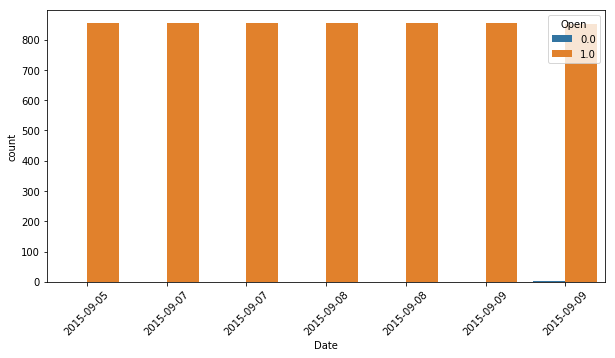

In [185]:
#找出空值的日期，作图看该日期其他店的营运情况
date_null=data_train_test[data_train_test.Open.isnull()].Date
#查看这个日期下其他店铺是否营业情况
data_date_null=data_train_test[data_train_test.Date.isin(date_null)]
df12=data_date_null.groupby(['Date','Open'])['Store'].count().rename('count').reset_index()

fig=plt.figure(figsize=(10,5))
ax=fig.add_subplot(1,1,1)
sns.barplot('Date','count',hue='Open',data=df12,ax=ax)
ax.set_xticklabels(df12.Date,rotation=45)

In [186]:
index_null=data_train_test[data_train_test.Open.isnull()].index
data_train_test.loc[index_null,'Open']=1
sum(data_train_test.Open.isnull())#查看是否补全空值


0

In [187]:
#检查每列的空值行数
def check_none_col(data,column):
    print('{}的缺失行数：'.format(column),sum(data[column].isnull()))
    print('{}的缺失率：'.format(column),round(sum(data[column].isnull())/data.shape[0],3))
columns=['CompetitionDistance','CompetitionOpenSinceMonth','CompetitionOpenSinceYear',
         'Promo2SinceWeek','Promo2SinceYear','PromoInterval']   
for i in columns:
    check_none_col(data_store,i)

CompetitionDistance的缺失行数： 3
CompetitionDistance的缺失率： 0.003
CompetitionOpenSinceMonth的缺失行数： 354
CompetitionOpenSinceMonth的缺失率： 0.317
CompetitionOpenSinceYear的缺失行数： 354
CompetitionOpenSinceYear的缺失率： 0.317
Promo2SinceWeek的缺失行数： 544
Promo2SinceWeek的缺失率： 0.488
Promo2SinceYear的缺失行数： 544
Promo2SinceYear的缺失率： 0.488
PromoInterval的缺失行数： 544
PromoInterval的缺失率： 0.488


In [188]:
#查看缺失列与sales的相关关系
data_tem=pd.concat([data_train_test[columns],data_train_test.Sales],axis=1)
data_tem.corr()

,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2SinceWeek,Promo2SinceYear,Sales
CompetitionDistance,1.000000,-0.059595,0.025997,-0.055272,-0.108762,-0.019229
CompetitionOpenSinceMonth,-0.059595,1.000000,-0.059889,-0.034530,0.049577,-0.028257
CompetitionOpenSinceYear,0.025997,-0.059889,1.000000,-0.080417,0.010982,0.012659
Promo2SinceWeek,-0.055272,-0.034530,-0.080417,1.000000,-0.242425,0.059558
Promo2SinceYear,-0.108762,0.049577,0.010982,-0.242425,1.000000,-0.021127
Sales,-0.019229,-0.028257,0.012659,0.059558,-0.021127,1.000000


In [189]:
#备份数据，以防改错数据
data_safe=data_train_test
#平均值填补距离
data_train_test.CompetitionDistance=data_train_test.CompetitionDistance.fillna(data_train_test.CompetitionDistance.mean())
#众数填补其他
for i in columns:
    data_train_test[i]=data_train_test[i].fillna(data_train_test[i].mode()[0])#mode返回series，不是一个数
check_none(data_train_test)

************有空值的列*************
Date                         False
DayOfWeek                    False
Open                         False
Promo                        False
Sales                         True
SchoolHoliday                False
StateHoliday                 False
Store                        False
StoreType                    False
Assortment                   False
CompetitionDistance          False
CompetitionOpenSinceMonth    False
CompetitionOpenSinceYear     False
Promo2                       False
Promo2SinceWeek              False
Promo2SinceYear              False
PromoInterval                False
year                         False
month                        False
day                          False
dtype: bool
************有空值的行*************
41088


In [190]:
data_train_test.dtypes

Date                          object
DayOfWeek                      int64
Open                         float64
Promo                          int64
Sales                        float64
SchoolHoliday                  int64
StateHoliday                  object
Store                          int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
year                           int64
month                          int64
day                            int64
dtype: object

In [191]:
#浮点数转为整数
def convert_to_int(data,columns):
    for i in columns:
        data[i]=data[i].astype(np.int64)
    return data
columns_float=['Open','CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Promo2SinceWeek','Promo2SinceYear']
data_train_test=convert_to_int(data_train_test,columns_float)
data_train_test.dtypes

Date                          object
DayOfWeek                      int64
Open                           int64
Promo                          int64
Sales                        float64
SchoolHoliday                  int64
StateHoliday                  object
Store                          int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth      int64
CompetitionOpenSinceYear       int64
Promo2                         int64
Promo2SinceWeek                int64
Promo2SinceYear                int64
PromoInterval                 object
year                           int64
month                          int64
day                            int64
dtype: object

In [192]:
#将数值数据转化为分类数据
def convert_to_object(data,columns):
    for i in columns:
        data[i]=data[i].astype(np.str)
    return data
columns_classify=['DayOfWeek','CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Promo2SinceWeek','Promo2SinceYear','year','month','day']
data_train_test=convert_to_object(data_train_test,columns_classify)
data_train_test.dtypes

Date                          object
DayOfWeek                     object
Open                           int64
Promo                          int64
Sales                        float64
SchoolHoliday                  int64
StateHoliday                  object
Store                          int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth     object
CompetitionOpenSinceYear      object
Promo2                         int64
Promo2SinceWeek               object
Promo2SinceYear               object
PromoInterval                 object
year                          object
month                         object
day                           object
dtype: object

In [193]:
check_unique(data_train_test)

列Date的取值，共有： 990
列DayOfWeek的取值，共有： 7
列Open的取值，共有： 2
列Promo的取值，共有： 2
列Sales的取值，共有： 21735
列SchoolHoliday的取值，共有： 2
列StateHoliday的取值，共有： 4
列Store的取值，共有： 1115
列StoreType的取值，共有： 4
列Assortment的取值，共有： 3
列CompetitionDistance的取值，共有： 655
列CompetitionOpenSinceMonth的取值，共有： 12
列CompetitionOpenSinceYear的取值，共有： 23
列Promo2的取值，共有： 2
列Promo2SinceWeek的取值，共有： 24
列Promo2SinceYear的取值，共有： 7
列PromoInterval的取值，共有： 3
列year的取值，共有： 3
列month的取值，共有： 12
列day的取值，共有： 31


In [194]:
data_store['PromoInterval'].value_counts()

Jan,Apr,Jul,Oct     335
Feb,May,Aug,Nov     130
Mar,Jun,Sept,Dec    106
Name: PromoInterval, dtype: int64

In [196]:
#分类数据二值化处理，onehot
def convert_to_twovalues(data,columns):
    connect_column=[]
    for i in columns:
        df_tem=pd.get_dummies(data[i],prefix=i)
        connect_column.append(df_tem)
    data_new=pd.concat(connect_column,axis=1)
    return data_new
columns_value_processing=['DayOfWeek','StateHoliday','StoreType','Assortment','CompetitionOpenSinceMonth',
                          'CompetitionOpenSinceYear','Promo2SinceWeek','Promo2SinceYear','PromoInterval','year','month','day']
data_value_processing=convert_to_twovalues(data_train_test,columns_value_processing)
data_value_processing.head()

,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,StateHoliday_公共假日,StateHoliday_圣诞节,StateHoliday_复活节假期,...,day_29,day_3,day_30,day_31,day_4,day_5,day_6,day_7,day_8,day_9
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [197]:
#数值类型进行归一化(0-1范围)
def feature_standarize(data,columns):
    combine_col=[]
    for j in columns:
        min_=data[j].min()
        max_=data[j].max()
        standard_col=data[j].apply(lambda x:(x-min_)/(max_-min_))#标准化为0-1范围
        #standard_col=data[j].apply(lambda x:(x-data[j].min())/(data[j].max()-data[j].min()))这样运行很慢，因为每次都要找min，max
        combine_col.append(standard_col)
    data_new2=pd.concat(combine_col,axis=1)
    return data_new2

data_CompetitionDistance=feature_standarize(data_train_test,['CompetitionDistance'])
data_CompetitionDistance.head()

,CompetitionDistance
0,0.016482
1,0.007252
2,0.186050
3,0.007911
4,0.394119


In [198]:
#连接数据data_value_processing，data_CompetitionDistance，data_train_test未作修改的列

data_train_test_new=pd.concat([data_value_processing,data_CompetitionDistance,data_train_test[['Open','Promo','SchoolHoliday','Promo2']]],axis=1)
data_train_test_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1058297 entries, 0 to 1058296
Columns: 138 entries, DayOfWeek_1 to Promo2
dtypes: float64(1), int64(4), uint8(133)
memory usage: 222.7 MB


In [199]:
#将数据拆分为训练_测试数据和预测数据
index_split=data_train.shape[0]-1
data_train_test_final=pd.concat([data_train_test_new.loc[:index_split],data_train['Sales']],axis=1)
data_for_predict=data_train_test_new.loc[data_train.shape[0]:]
print(data_train_test_final.info())#打印训练测试数据信息
print(data_for_predict.info())#打印预测数据信息

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Columns: 139 entries, DayOfWeek_1 to Sales
dtypes: float64(1), int64(5), uint8(133)
memory usage: 183.3 MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 41088 entries, 1017209 to 1058296
Columns: 138 entries, DayOfWeek_1 to Promo2
dtypes: float64(1), int64(4), uint8(133)
memory usage: 7.1 MB
None


In [200]:
#做模型前先看看各变量与销售额的相关关系
corr=data_train_test_final.corr()['Sales']
print('{:*^30}'.format('正相关前10的列'))
print(corr.sort_values(ascending=False)[:10])
print('{:*^30}'.format('负相关前10的列'))
print(corr.sort_values()[:10])

***********正相关前10的列***********
Sales             1.000000
Open              0.678472
Promo             0.452345
StateHoliday_无    0.254216
DayOfWeek_1       0.215309
StoreType_b       0.139940
DayOfWeek_2       0.130764
DayOfWeek_5       0.100895
SchoolHoliday     0.085124
DayOfWeek_3       0.083047
Name: Sales, dtype: float64
***********负相关前10的列***********
DayOfWeek_7                      -0.589219
StateHoliday_公共假日                -0.203028
StateHoliday_复活节假期               -0.117497
StateHoliday_圣诞节                 -0.092618
Promo2                           -0.091040
Assortment_a                     -0.080494
Promo2SinceYear_2013             -0.079153
day_1                            -0.053450
PromoInterval_Mar,Jun,Sept,Dec   -0.053267
day_25                           -0.045535
Name: Sales, dtype: float64


In [201]:
#导入模型
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV,cross_val_score,StratifiedKFold,train_test_split
from sklearn.metrics import mean_squared_error,r2_score
#拆分数据为训练数据和测试数据
data_x=data_train_test_final.iloc[:,:-1]
data_y=data_train_test_final.iloc[:,-1:]
train_x,test_x,train_y,test_y=train_test_split(data_x,data_y,test_size=0.2)
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

D:\ProgramFiles\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


(813767, 138)
(813767, 1)
(203442, 138)
(203442, 1)


In [203]:
import warnings
warnings.filterwarnings("ignore")
import time

#用cross_val_score交叉检验各模型的评分
lr_model=LinearRegression()
tree_model=DecisionTreeRegressor()
gbdt_model=GradientBoostingRegressor()
rfr_model=RandomForestRegressor()
models=[lr_model,tree_model,rfr_model,gbdt_model]
model_names=['lr_model','tree_model','rfr_model','gbdt_model']
scores=[]
for model,model_name in zip(models,model_names):
    t5=time.time()
    score=cross_val_score(model,train_x,train_y,cv=StratifiedKFold(5))
    t6=time.time()
    print('{}运行时间：'.format(model_name),(t6-t5))
    scores.append(score)
score_matrix=pd.DataFrame(scores,index=model_names)
score_matrix['mean']=score_matrix.mean(axis=1)
score_matrix['std']=score_matrix.std(axis=1)
print('{:*^30}'.format('各模型分数矩阵'))
print(score_matrix)

lr_model运行时间： 142.30733966827393
tree_model运行时间： 203.0049855709076
rfr_model运行时间： 704.7088928222656
gbdt_model运行时间： 1252.8785724639893
***********各模型分数矩阵************
                   0         1         2         3         4      mean  \
lr_model    0.533623  0.607483  0.632179  0.644794  0.651024  0.613821   
tree_model  0.882182  0.898470  0.897773  0.895960  0.896433  0.894164   
rfr_model   0.913771  0.938675  0.937934  0.938716  0.937396  0.933298   
gbdt_model  0.569299  0.656730  0.680459  0.693574  0.699992  0.660011   

                 std  
lr_model    0.042784  
tree_model  0.006058  
rfr_model   0.009776  
gbdt_model  0.047713  


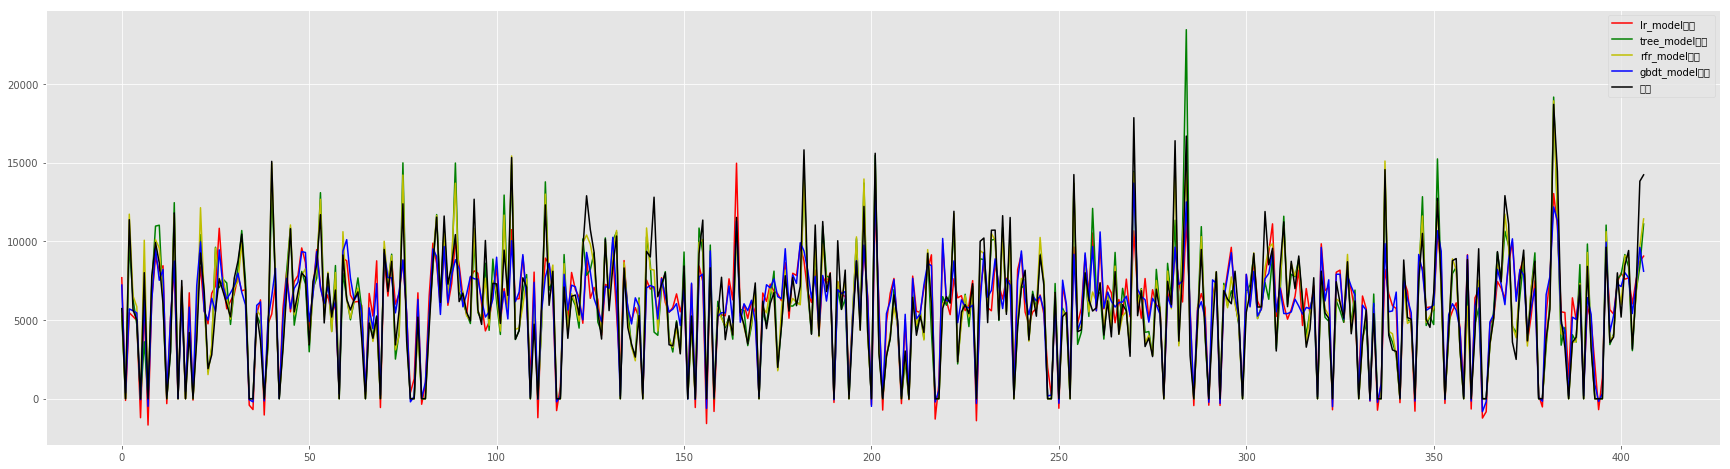

In [204]:
#对测试数据进行预测和实际结果对比，并通过mse和r2评分，将分数保存到scores3里
scores3=[]
for model,model_name in zip(models,model_names):
    model.fit(train_x,train_y)
    y_pred=model.predict(test_x)
    mse=mean_squared_error(test_y,y_pred)
    r2=r2_score(test_y,y_pred)
    scores3.append([mse,r2])

#作图查看测试数据预测和实际拟合程度，对测试数据预测数据间隔400取数，这样图能看的更清晰
y_lr_predict=lr_model.predict(test_x)
y_tree_predict=tree_model.predict(test_x)
y_rfr_predict=rfr_model.predict(test_x)
y_gbdt_predict=gbdt_model.predict(test_x)

fig=plt.figure(figsize=(30,8))
plt.style.use('ggplot')
predicts=[y_lr_predict,y_tree_predict,y_rfr_predict,y_gbdt_predict]
colors=['r','g','y','b']
for predict,model_name,color in zip(predicts,model_names,colors):
    plt.plot(predict[::500].reshape(1,-1)[0],color=color,label='{}预测'.format(model_name))#间隔400取值
plt.plot(test_y.loc[::500,'Sales'].values,color='k',label='实际')    
#range(test_y.shape[0]),
#test_y.plot(ax=ax,color='k',label='')
plt.legend(loc=0)